First 5 rows of the dataset:
  Car_Name  Year  Selling_Price  Present_Price  Driven_kms Fuel_Type  \
0     ritz  2014           3.35           5.59       27000    Petrol   
1      sx4  2013           4.75           9.54       43000    Diesel   
2     ciaz  2017           7.25           9.85        6900    Petrol   
3  wagon r  2011           2.85           4.15        5200    Petrol   
4    swift  2014           4.60           6.87       42450    Diesel   

  Selling_type Transmission  Owner  
0       Dealer       Manual      0  
1       Dealer       Manual      0  
2       Dealer       Manual      0  
3       Dealer       Manual      0  
4       Dealer       Manual      0  

DataFrame Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Car_Name       301 non-null    object 
 1   Year           301 non-null    int64  
 2   Selling_Price 

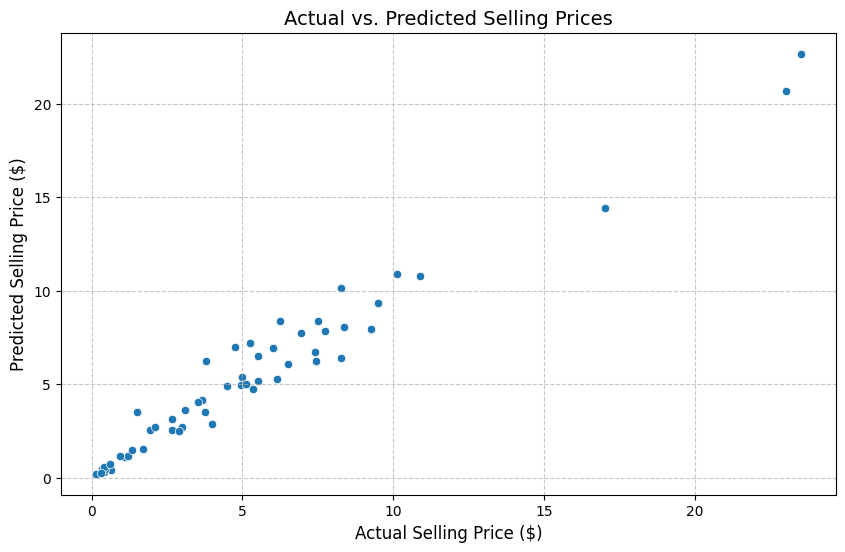

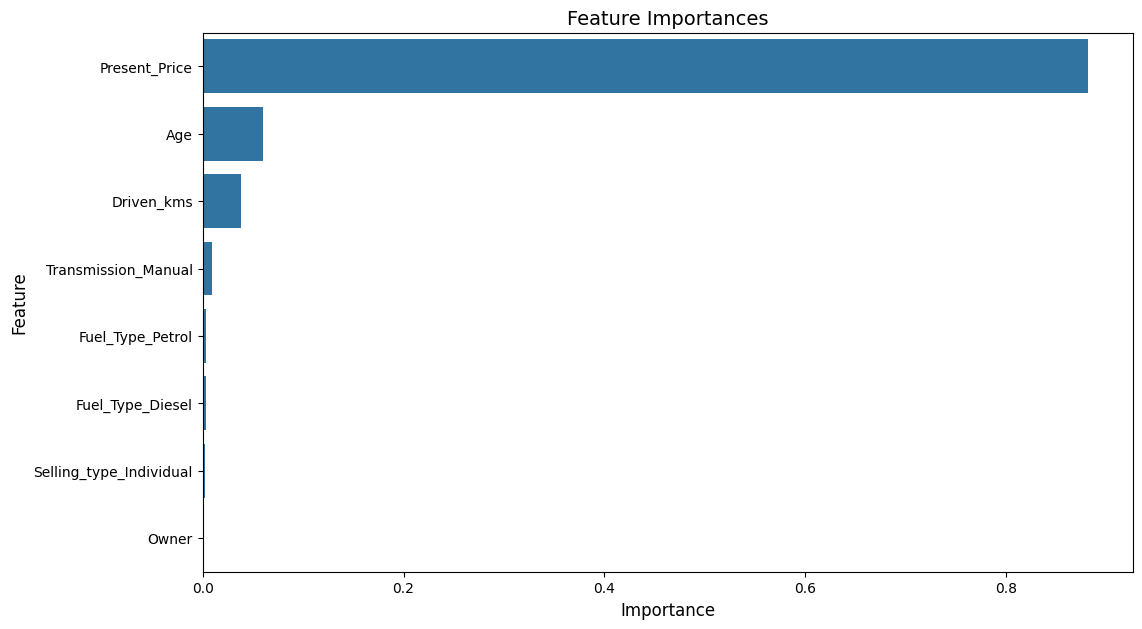

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
df = pd.read_csv('car data.csv')

# Display the first few rows
print("First 5 rows of the dataset:")
print(df.head())

# Get a concise summary of the DataFrame
print("\nDataFrame Info:")
df.info()

# Get descriptive statistics
print("\nDescriptive Statistics:")
print(df.describe())

# Check for missing values
print("\nMissing Values:")
print(df.isnull().sum())

# Check unique values for categorical features
print("\nUnique values for 'Fuel_Type':", df['Fuel_Type'].unique())
print("Unique values for 'Selling_type':", df['Selling_type'].unique())
print("Unique values for 'Transmission':", df['Transmission'].unique())
print("Unique values for 'Owner':", df['Owner'].unique())
# Handle categorical features using one-hot encoding
df_encoded = pd.get_dummies(df, columns=['Fuel_Type', 'Selling_type', 'Transmission'], drop_first=True)

# Display the first few rows of the encoded DataFrame
print("\nFirst 5 rows of the encoded dataset:")
print(df_encoded.head())

# Drop 'Car_Name' as it's not useful for prediction and 'Owner' as it's already numerical
df_processed = df_encoded.drop(['Car_Name'], axis=1)

# The 'Owner' column is already numerical (0, 1, 3), so it can be used directly.
# If it were a string, we would need to encode it.
# For this dataset, 'Owner' is already suitable.

print("\nProcessed DataFrame Info (after encoding and dropping Car_Name):")
df_processed.info()
# Calculate the current year
from datetime import datetime
current_year = datetime.now().year

# Create a new feature 'Age'
df_processed['Age'] = current_year - df_processed['Year']

# Drop the original 'Year' column
df_processed = df_processed.drop('Year', axis=1)

print("\nFirst 5 rows of the dataset with 'Age' feature:")
print(df_processed.head())
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, r2_score

# Define features (X) and target (y)
X = df_processed.drop('Selling_Price', axis=1)
y = df_processed['Selling_Price']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(f"\nTraining data shape: {X_train.shape}")
print(f"Testing data shape: {X_test.shape}")

# Initialize and train the Random Forest Regressor model
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

print("\nRandom Forest Regressor model trained successfully.")
# Make predictions on the test set
y_pred = model.predict(X_test)

# Evaluate the model
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"\nModel Evaluation:")
print(f"Mean Absolute Error (MAE): \${mae:.2f}\$")
print(f"R-squared (R2) Score: \${r2:.2f}\$")

# Visualize predictions vs. actual values
plt.figure(figsize=(10, 6))
sns.scatterplot(x=y_test, y=y_pred)
plt.xlabel("Actual Selling Price (\$)", fontsize=12)
plt.ylabel("Predicted Selling Price (\$)", fontsize=12)
plt.title("Actual vs. Predicted Selling Prices", fontsize=14)
plt.grid(True, linestyle='--', alpha=0.7)
plt.show()

# Plotting feature importances
feature_importances = pd.Series(model.feature_importances_, index=X.columns).sort_values(ascending=False)
plt.figure(figsize=(12, 7))
sns.barplot(x=feature_importances, y=feature_importances.index)
plt.title("Feature Importances", fontsize=14)
plt.xlabel("Importance", fontsize=12)
plt.ylabel("Feature", fontsize=12)
plt.show()
